In [73]:
import numpy as np
import numpy.random as npr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

In [3]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [4]:
# Loading Data
data = np.load('preprocessed64.npy')
labels = np.load('newlabel.npy')
# labels = to_categorical(labels)

In [5]:
# split
train_images , test_images , train_labels, test_labels = train_test_split(data, labels, test_size = 0.1, stratify = labels)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [6]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [18]:
# Build the model
model_A = tf.keras.Sequential([
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dense(64, activation='elu'),
    Dense(10)
])

model_A.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [19]:
# fit 
epochs = 100
history = model_A.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 1s 10ms/step - loss: 2.6510 - accuracy: 0.1322 - val_loss: 2.2987 - val_accuracy: 0.1224
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 2.1853 - accuracy: 0.2039 - val_loss: 2.1214 - val_accuracy: 0.2090
Epoch 3/100
95/95 [==============================] - 1s 9ms/step - loss: 2.0550 - accuracy: 0.2698 - val_loss: 1.9528 - val_accuracy: 0.3269
Epoch 4/100
95/95 [==============================] - 1s 9ms/step - loss: 1.9829 - accuracy: 0.2967 - val_loss: 2.0859 - val_accuracy: 0.2313
Epoch 5/100
95/95 [==============================] - 1s 9ms/step - loss: 1.9324 - accuracy: 0.3174 - val_loss: 2.0140 - val_accuracy: 0.2687
Epoch 6/100
95/95 [==============================] - 1s 9ms/step - loss: 1.8285 - accuracy: 0.3582 - val_loss: 1.9266 - val_accuracy: 0.3418
Epoch 7/100
95/95 [==============================] - 1s 9ms/step - loss: 1.7684 - accuracy: 0.3891 - val_loss: 1.8179 - val_accuracy: 0.3851
Epoch 8/100


Epoch 59/100
95/95 [==============================] - 1s 9ms/step - loss: 0.8528 - accuracy: 0.7100 - val_loss: 1.7963 - val_accuracy: 0.5552
Epoch 60/100
95/95 [==============================] - 1s 10ms/step - loss: 0.8698 - accuracy: 0.6990 - val_loss: 1.6391 - val_accuracy: 0.5612
Epoch 61/100
95/95 [==============================] - 1s 9ms/step - loss: 0.8727 - accuracy: 0.6990 - val_loss: 1.6465 - val_accuracy: 0.5791
Epoch 62/100
95/95 [==============================] - 1s 9ms/step - loss: 0.8096 - accuracy: 0.7194 - val_loss: 1.6127 - val_accuracy: 0.5701
Epoch 63/100
95/95 [==============================] - 1s 9ms/step - loss: 0.8574 - accuracy: 0.7111 - val_loss: 1.6512 - val_accuracy: 0.5478
Epoch 64/100
95/95 [==============================] - 1s 9ms/step - loss: 0.8147 - accuracy: 0.7227 - val_loss: 1.6749 - val_accuracy: 0.5746
Epoch 65/100
95/95 [==============================] - 1s 9ms/step - loss: 0.7705 - accuracy: 0.7340 - val_loss: 1.6946 - val_accuracy: 0.5612
Epoch

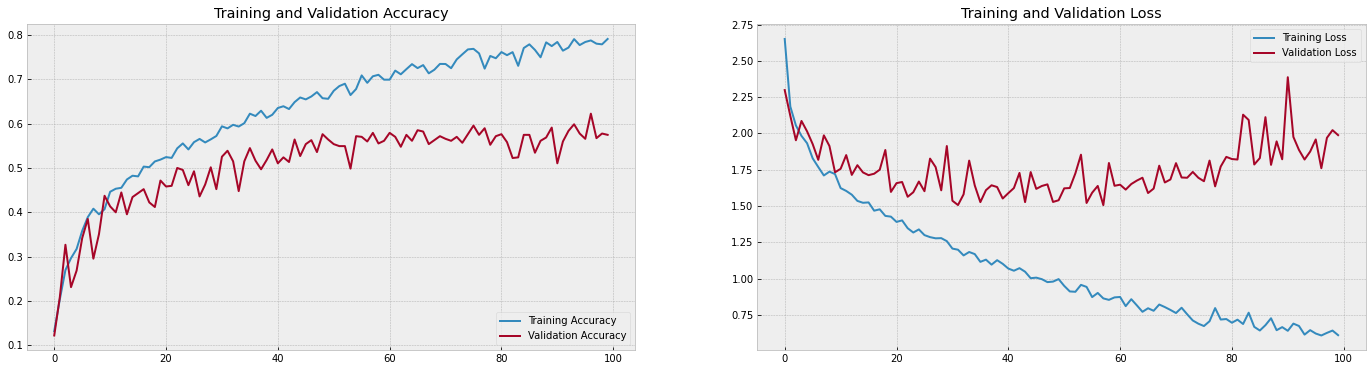

In [26]:
epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Build the model
model_B = tf.keras.Sequential([
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.1),
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(10)
])

model_B.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [22]:
# fit 
epochs = 100
history2 = model_B.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 1s 10ms/step - loss: 2.7596 - accuracy: 0.1145 - val_loss: 2.2640 - val_accuracy: 0.1701
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 2.3204 - accuracy: 0.1586 - val_loss: 2.2035 - val_accuracy: 0.1970
Epoch 3/100
95/95 [==============================] - 1s 9ms/step - loss: 2.2317 - accuracy: 0.1963 - val_loss: 2.1374 - val_accuracy: 0.2134
Epoch 4/100
95/95 [==============================] - 1s 9ms/step - loss: 2.1573 - accuracy: 0.2202 - val_loss: 2.0560 - val_accuracy: 0.2493
Epoch 5/100
95/95 [==============================] - 1s 9ms/step - loss: 2.0438 - accuracy: 0.2723 - val_loss: 1.8938 - val_accuracy: 0.3373
Epoch 6/100
95/95 [==============================] - 1s 10ms/step - loss: 2.0366 - accuracy: 0.2708 - val_loss: 2.1334 - val_accuracy: 0.2612
Epoch 7/100
95/95 [==============================] - 1s 10ms/step - loss: 1.9687 - accuracy: 0.3068 - val_loss: 1.9235 - val_accuracy: 0.3134
Epoch 8/10

95/95 [==============================] - 1s 10ms/step - loss: 0.9953 - accuracy: 0.6478 - val_loss: 1.4070 - val_accuracy: 0.5851
Epoch 59/100
95/95 [==============================] - 1s 10ms/step - loss: 0.9898 - accuracy: 0.6456 - val_loss: 1.3952 - val_accuracy: 0.5940
Epoch 60/100
95/95 [==============================] - 1s 10ms/step - loss: 0.9930 - accuracy: 0.6482 - val_loss: 1.4374 - val_accuracy: 0.5806
Epoch 61/100
95/95 [==============================] - 1s 10ms/step - loss: 0.9696 - accuracy: 0.6534 - val_loss: 1.4884 - val_accuracy: 0.5731
Epoch 62/100
95/95 [==============================] - 1s 9ms/step - loss: 0.9753 - accuracy: 0.6519 - val_loss: 1.4830 - val_accuracy: 0.5716
Epoch 63/100
95/95 [==============================] - 1s 10ms/step - loss: 0.9649 - accuracy: 0.6662 - val_loss: 1.5111 - val_accuracy: 0.5687
Epoch 64/100
95/95 [==============================] - 1s 10ms/step - loss: 0.9938 - accuracy: 0.6541 - val_loss: 1.4240 - val_accuracy: 0.5881
Epoch 65/100


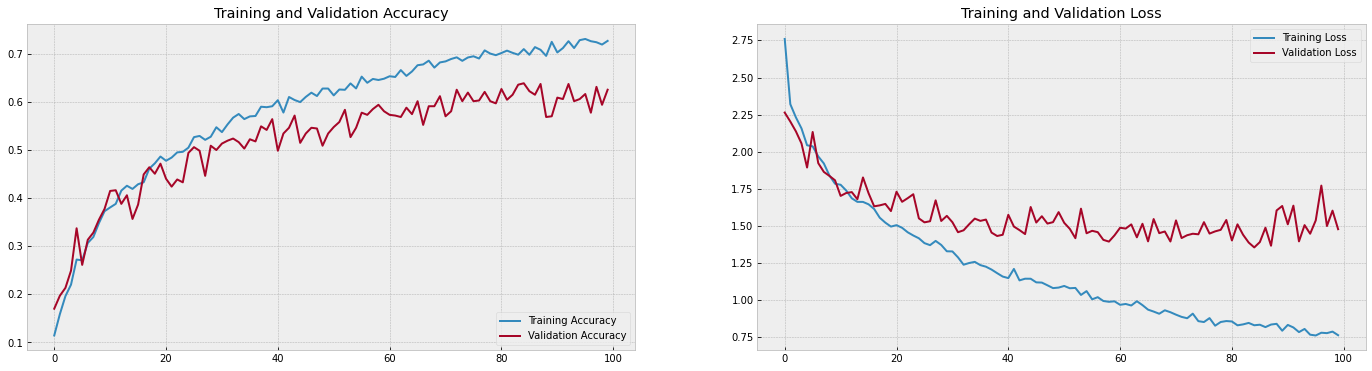

In [25]:
epochs = 100
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomZoom(0.01),
  ]
)

In [14]:
# Build the model
model_C = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu'),
    Dropout(0.08),
    Dense(10)
])

model_C.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [15]:
# fit 
epochs = 100
history3 = model_C.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 2s 12ms/step - loss: 2.6117 - accuracy: 0.1137 - val_loss: 2.2326 - val_accuracy: 0.1925
Epoch 2/100
95/95 [==============================] - 1s 11ms/step - loss: 2.2943 - accuracy: 0.1568 - val_loss: 2.2126 - val_accuracy: 0.2045
Epoch 3/100
95/95 [==============================] - 1s 11ms/step - loss: 2.2012 - accuracy: 0.1969 - val_loss: 2.0056 - val_accuracy: 0.3000
Epoch 4/100
95/95 [==============================] - 1s 11ms/step - loss: 2.1325 - accuracy: 0.2273 - val_loss: 1.9985 - val_accuracy: 0.2791
Epoch 5/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0881 - accuracy: 0.2481 - val_loss: 1.9547 - val_accuracy: 0.3030
Epoch 6/100
95/95 [==============================] - 1s 12ms/step - loss: 1.9955 - accuracy: 0.2844 - val_loss: 1.8374 - val_accuracy: 0.3418
Epoch 7/100
95/95 [==============================] - 1s 12ms/step - loss: 1.9054 - accuracy: 0.3202 - val_loss: 1.8072 - val_accuracy: 0.3970
Epoch 

95/95 [==============================] - 1s 12ms/step - loss: 1.1375 - accuracy: 0.6044 - val_loss: 1.4251 - val_accuracy: 0.5537
Epoch 59/100
95/95 [==============================] - 1s 13ms/step - loss: 1.0965 - accuracy: 0.6242 - val_loss: 1.3522 - val_accuracy: 0.5970
Epoch 60/100
95/95 [==============================] - 1s 13ms/step - loss: 1.1004 - accuracy: 0.6167 - val_loss: 1.4135 - val_accuracy: 0.5791
Epoch 61/100
95/95 [==============================] - 1s 12ms/step - loss: 1.1320 - accuracy: 0.6073 - val_loss: 1.4124 - val_accuracy: 0.5627
Epoch 62/100
95/95 [==============================] - 1s 12ms/step - loss: 1.0991 - accuracy: 0.6242 - val_loss: 1.4039 - val_accuracy: 0.5731
Epoch 63/100
95/95 [==============================] - 1s 12ms/step - loss: 1.0691 - accuracy: 0.6295 - val_loss: 1.5772 - val_accuracy: 0.5119
Epoch 64/100
95/95 [==============================] - 1s 12ms/step - loss: 1.0892 - accuracy: 0.6267 - val_loss: 1.4366 - val_accuracy: 0.5507
Epoch 65/100

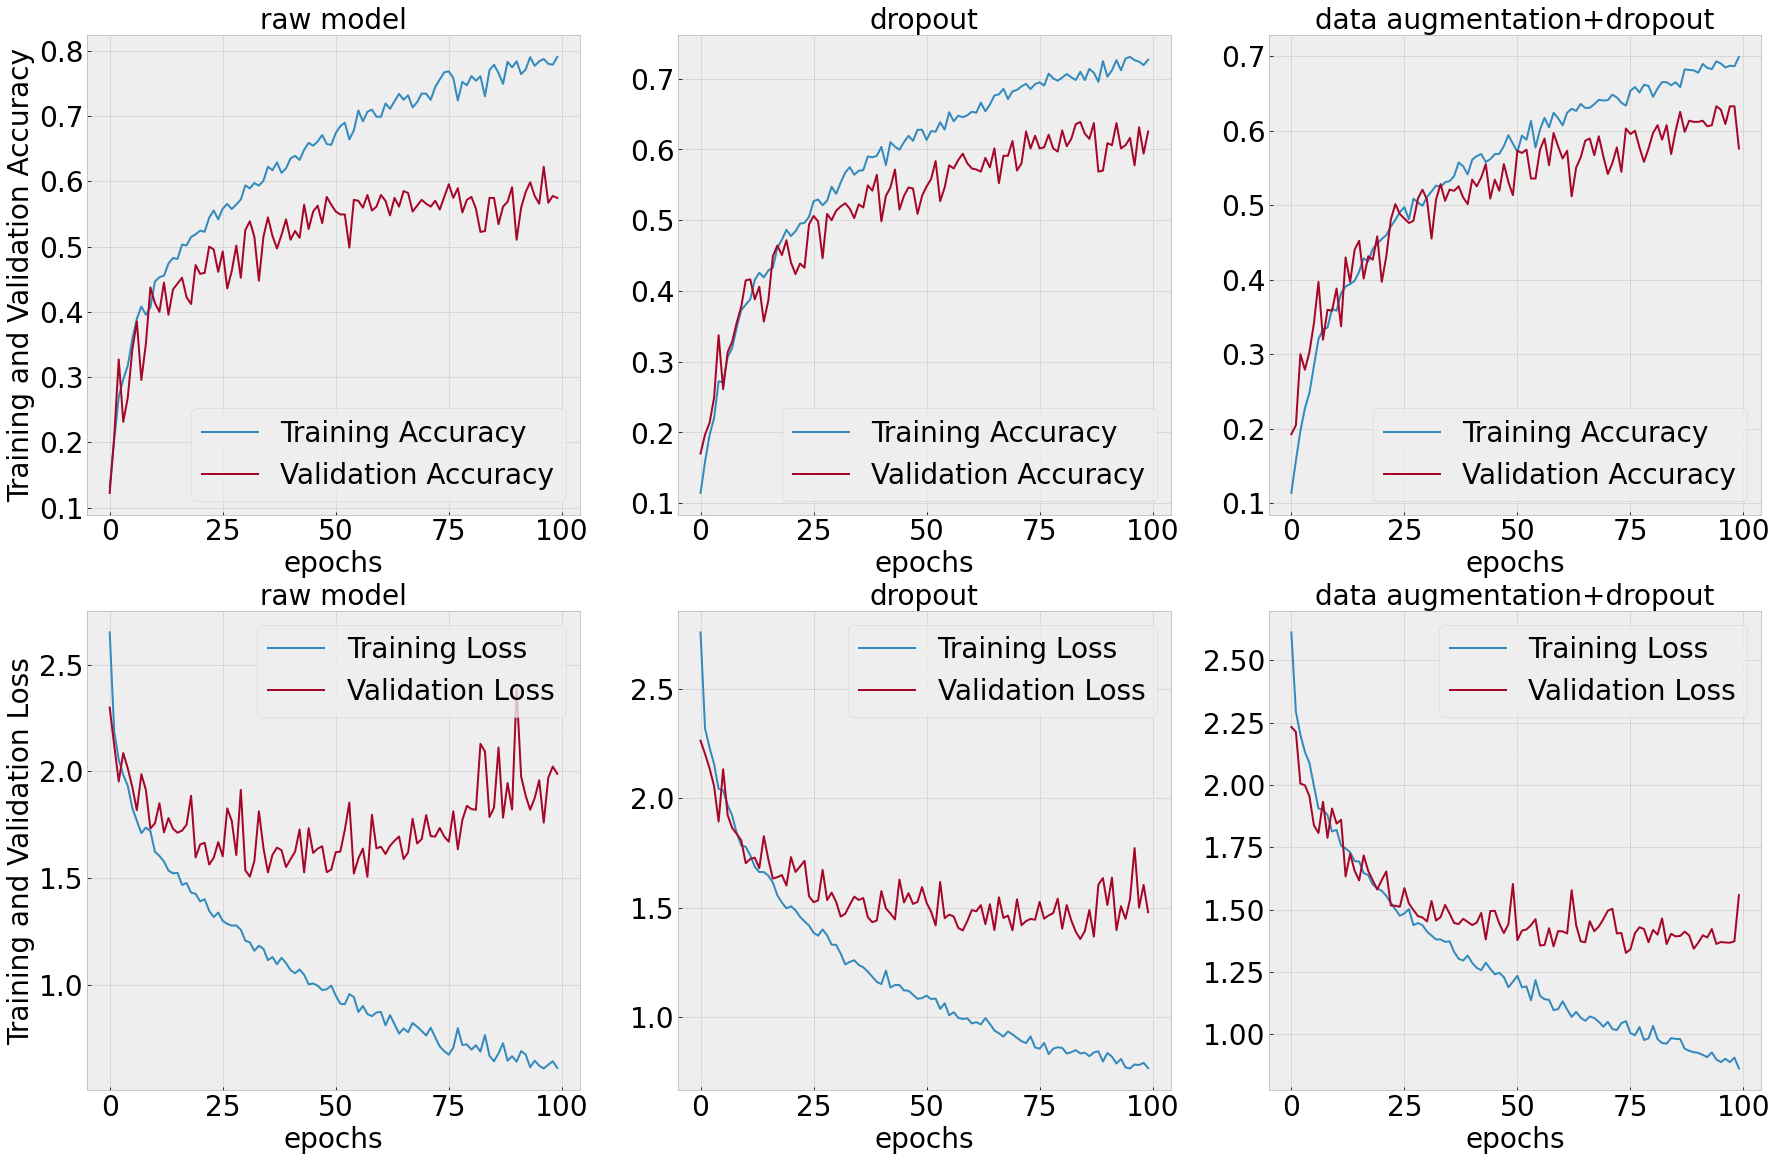

In [77]:
epochs_range = range(epochs)
fronttsize = 28

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(30, 30))


plt.subplot(3, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right', prop={'size': fronttsize})
plt.title('raw model', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)
plt.ylabel('Training and Validation Accuracy', fontsize=fronttsize)



plt.subplot(3, 3, 4)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right', prop={'size': fronttsize})
plt.title('raw model', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)
plt.ylabel('Training and Validation Loss', fontsize=fronttsize)

plt.subplot(3, 3, 2)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right', prop={'size': fronttsize})
plt.title('dropout', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)


plt.subplot(3, 3, 5)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right', prop={'size': fronttsize})
plt.title('dropout', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)

plt.subplot(3, 3, 3)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right', prop={'size': fronttsize})
plt.title('data augmentation+dropout', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)

plt.subplot(3, 3, 6)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right', prop={'size': fronttsize})
plt.title('data augmentation+dropout', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)

plt.savefig('overfitting.png')
plt.show()

In [64]:
plt.savefig('overfitting.png')

<Figure size 432x288 with 0 Axes>